In [1]:
import numpy as np
import scipy as sp
import arviz as az
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
g_state = ["fixed","free"]
sim_g = g_state[0]
extra = ["","_I1"]
I0 = extra[0]
R0 = 3

In [3]:
c0 = {}
for i in range(30):
    c0[f"Sim_{i}"] = np.genfromtxt(f"..\..\Data\R0_{R0}\Sims_SIR\c0\{sim_g}_g_Sims_{i}_c0_{R0}.csv")

In [4]:
c1 = {}
for i in range(30):
    c1[f"Sim_{i}"] = np.genfromtxt(f"..\..\Data\R0_{R0}\Sims_SIR\c1\{sim_g}_g_Sims_{i}_c1_{R0}.csv")

In [5]:
c2 = {}
for i in range(30):
    c2[f"Sim_{i}"] = np.genfromtxt(f"..\..\Data\R0_{R0}\Sims_SIR\c2\{sim_g}_g_Sims_{i}_c2_{R0}.csv")

In [6]:
c3 = {}
for i in range(30):
    c3[f"Sim_{i}"] = np.genfromtxt(f"..\..\Data\R0_{R0}\Sims_SIR\c3\{sim_g}_g_Sims_{i}_c3_{R0}.csv")

C:\Users\ollie\AppData\Local\Temp\ipykernel_5124\3755949090.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


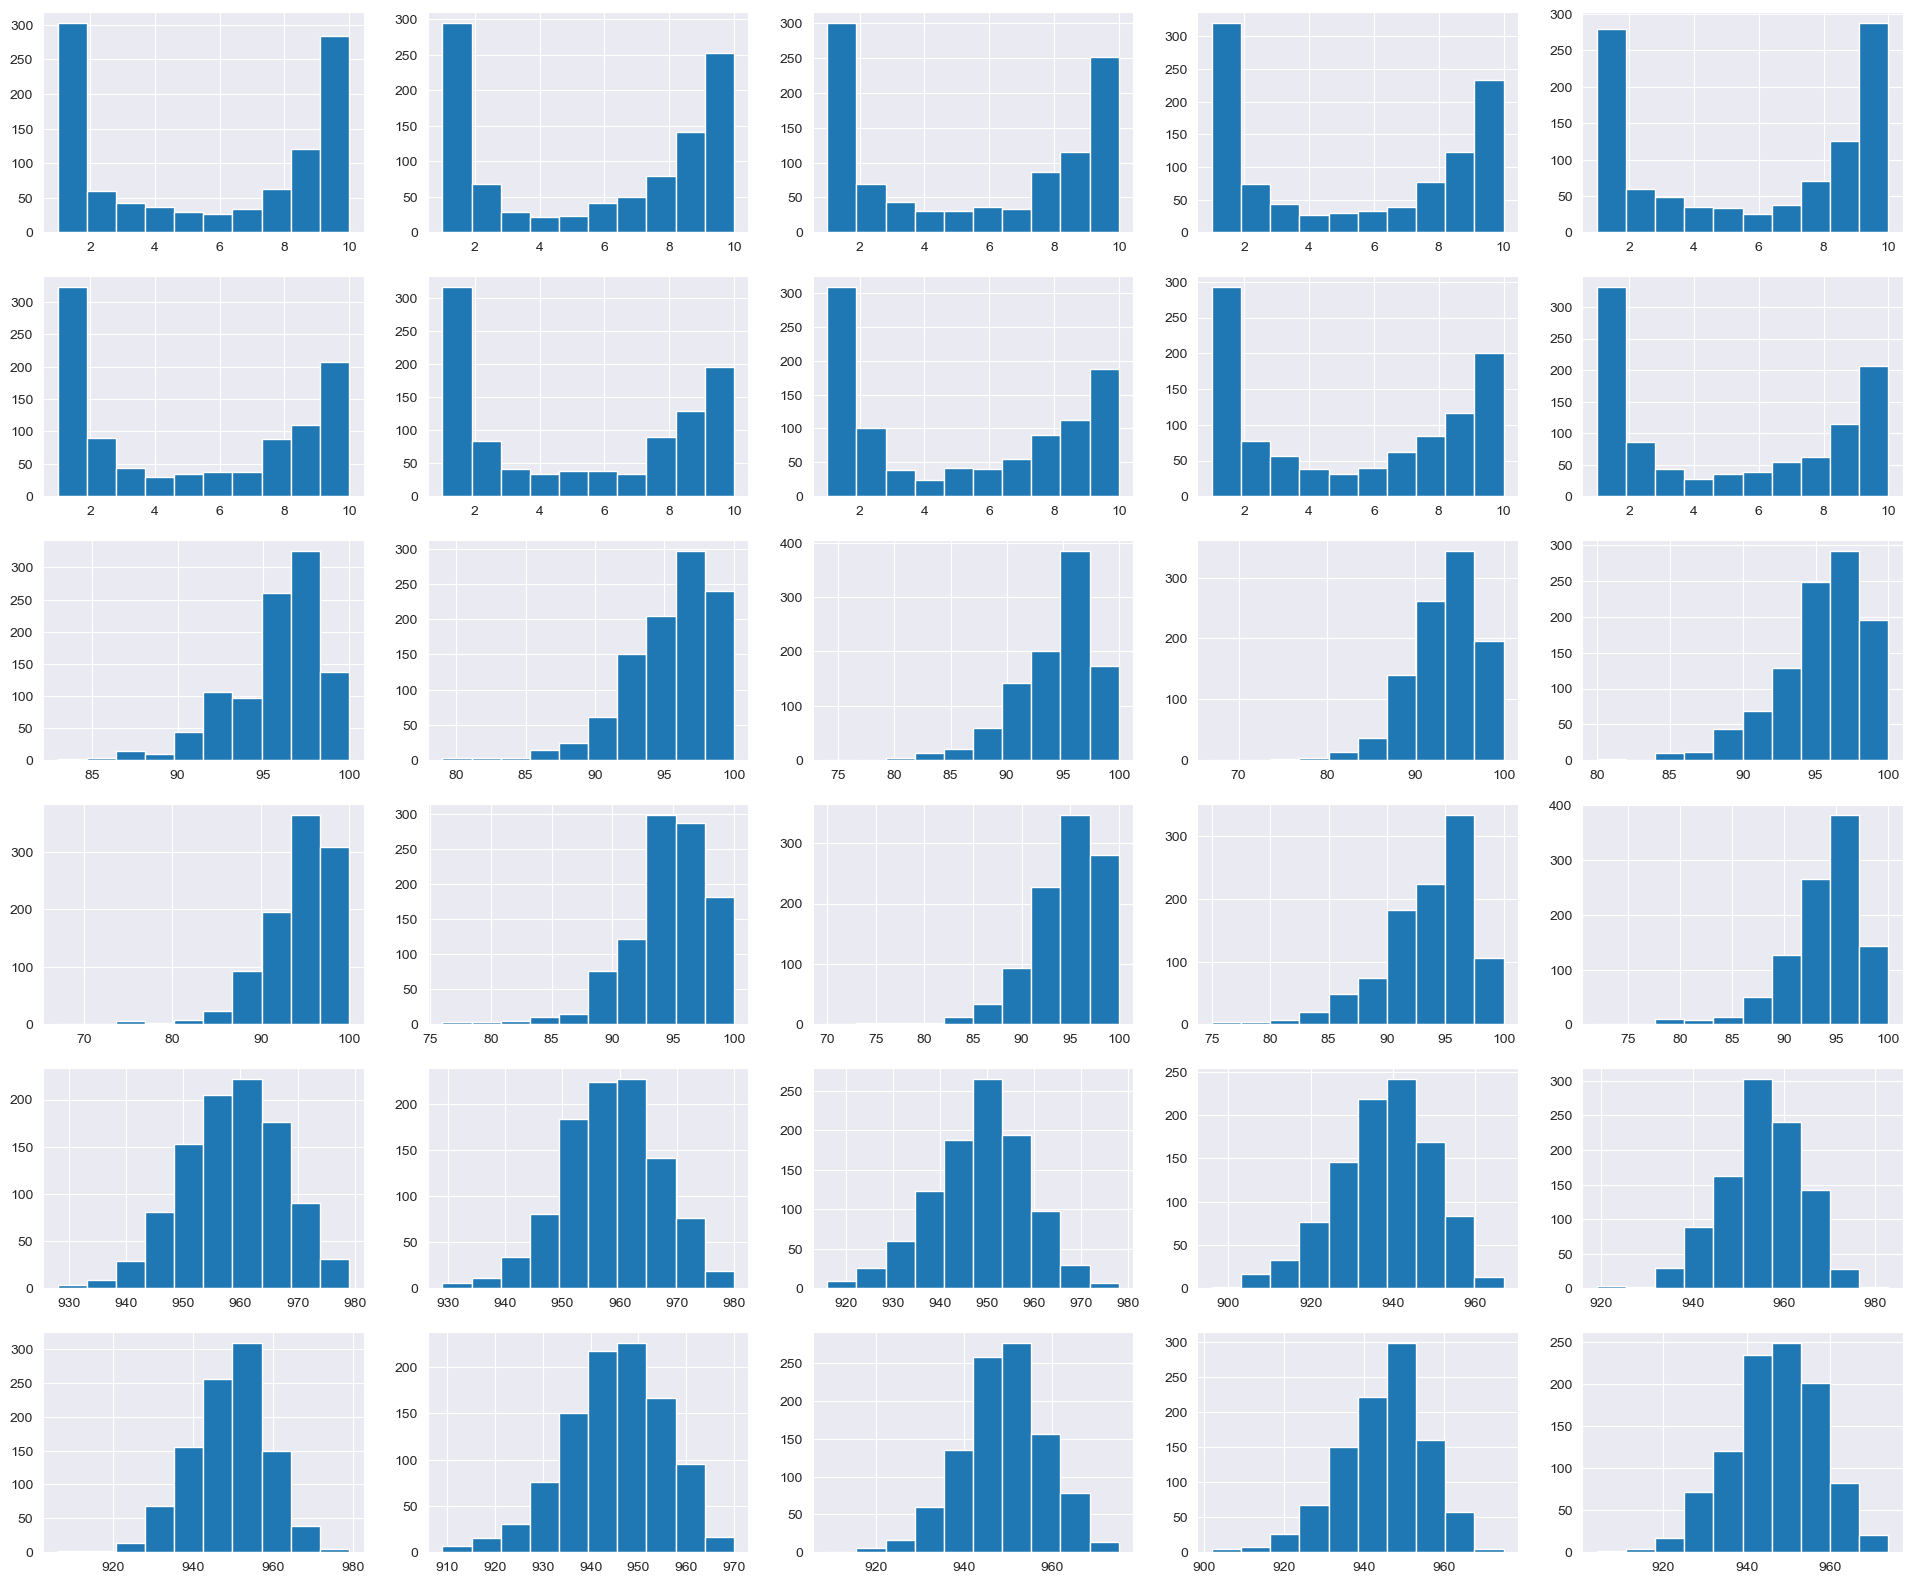

In [7]:
fig, ax0 = plt.subplots(nrows=6, ncols= 5, figsize = (24,20))
counter = 0
for i in range(6):
    for j in range(5):
        ax0[i,j].hist(c0[f"Sim_{counter}"])
        counter += 1
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_5124\710942198.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


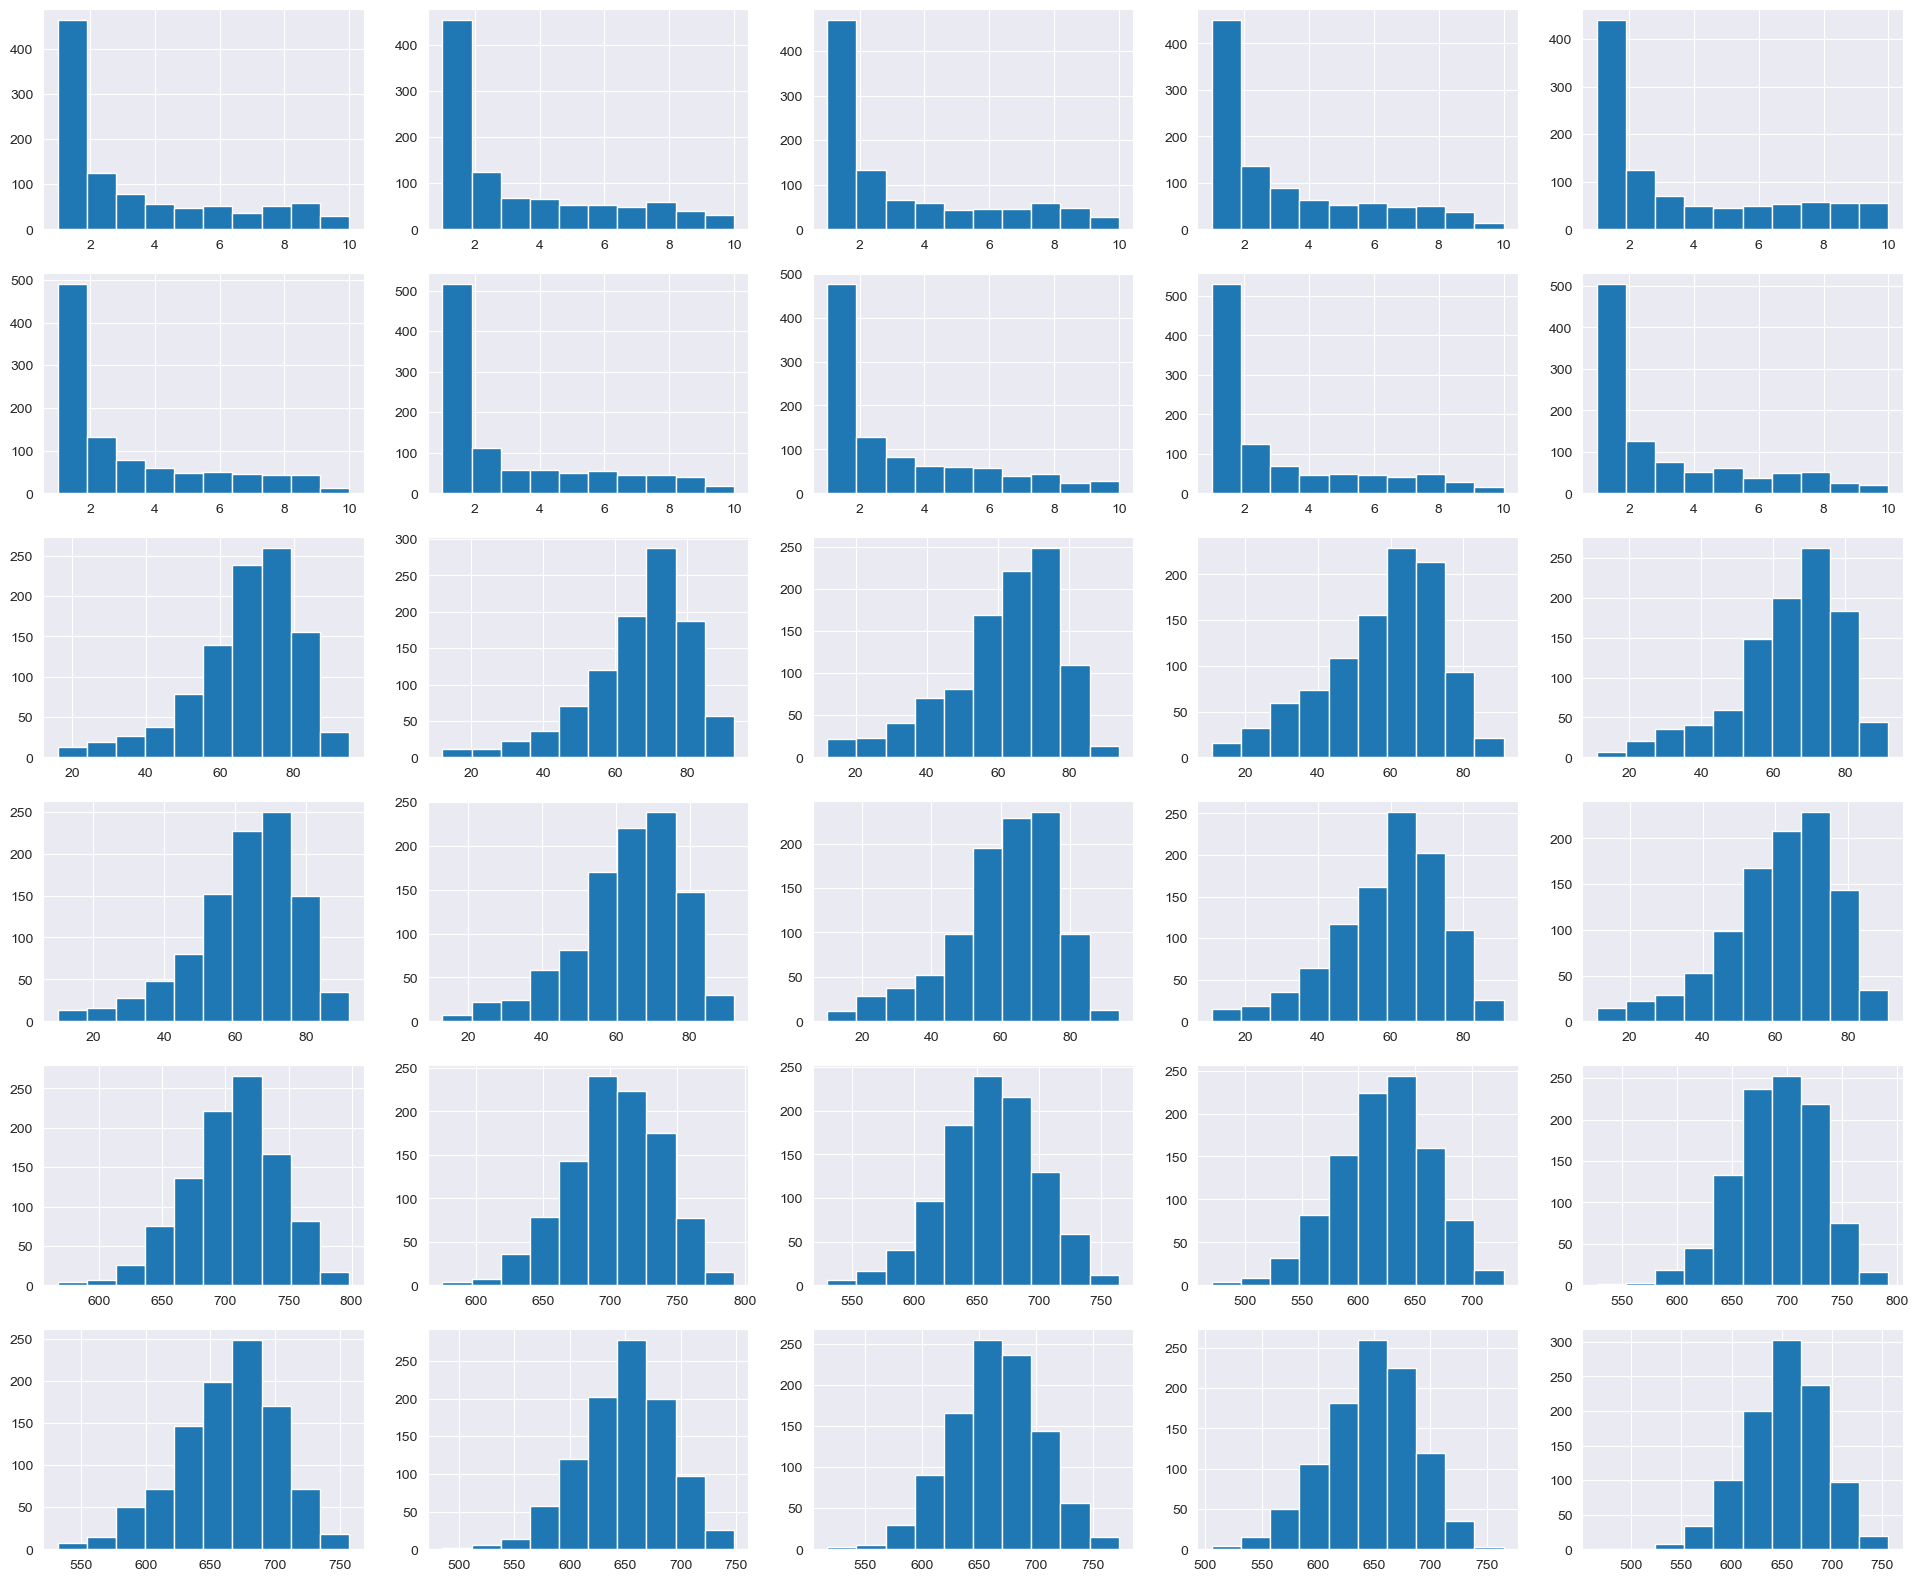

In [8]:
fig, ax0 = plt.subplots(nrows=6, ncols= 5, figsize = (24,20))
counter = 0
for i in range(6):
    for j in range(5):
        ax0[i,j].hist(c1[f"Sim_{counter}"])
        counter += 1
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_5124\4221714493.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


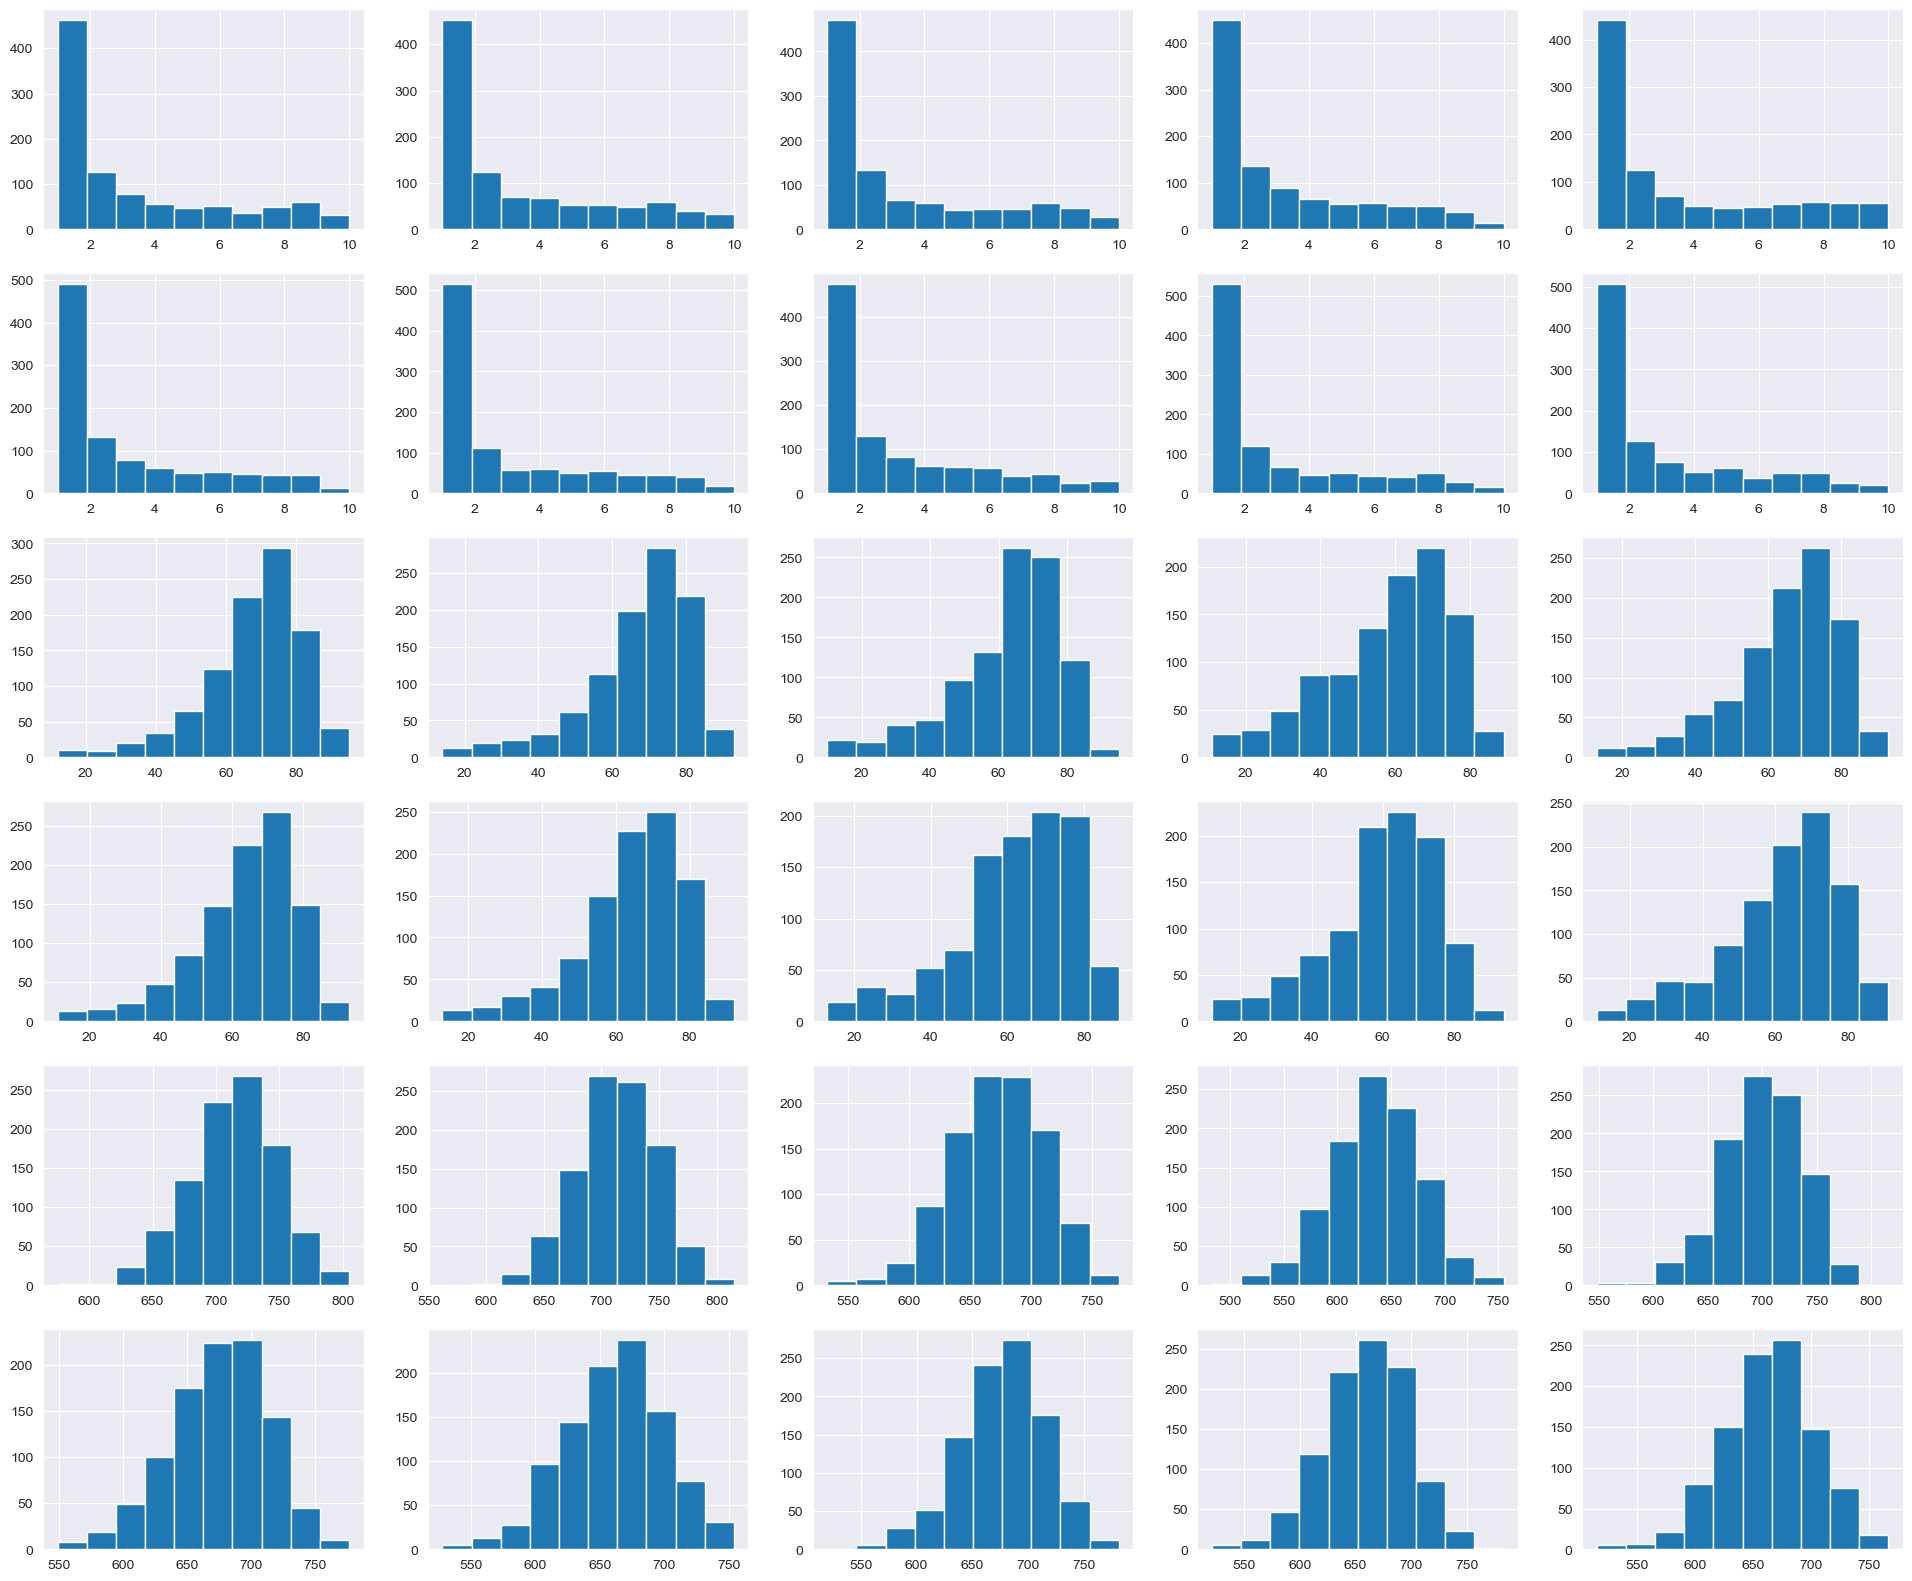

In [9]:
fig, ax0 = plt.subplots(nrows=6, ncols= 5, figsize = (24,20))
counter = 0
for i in range(6):
    for j in range(5):
        ax0[i,j].hist(c2[f"Sim_{counter}"])
        counter += 1
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_5124\2349077104.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


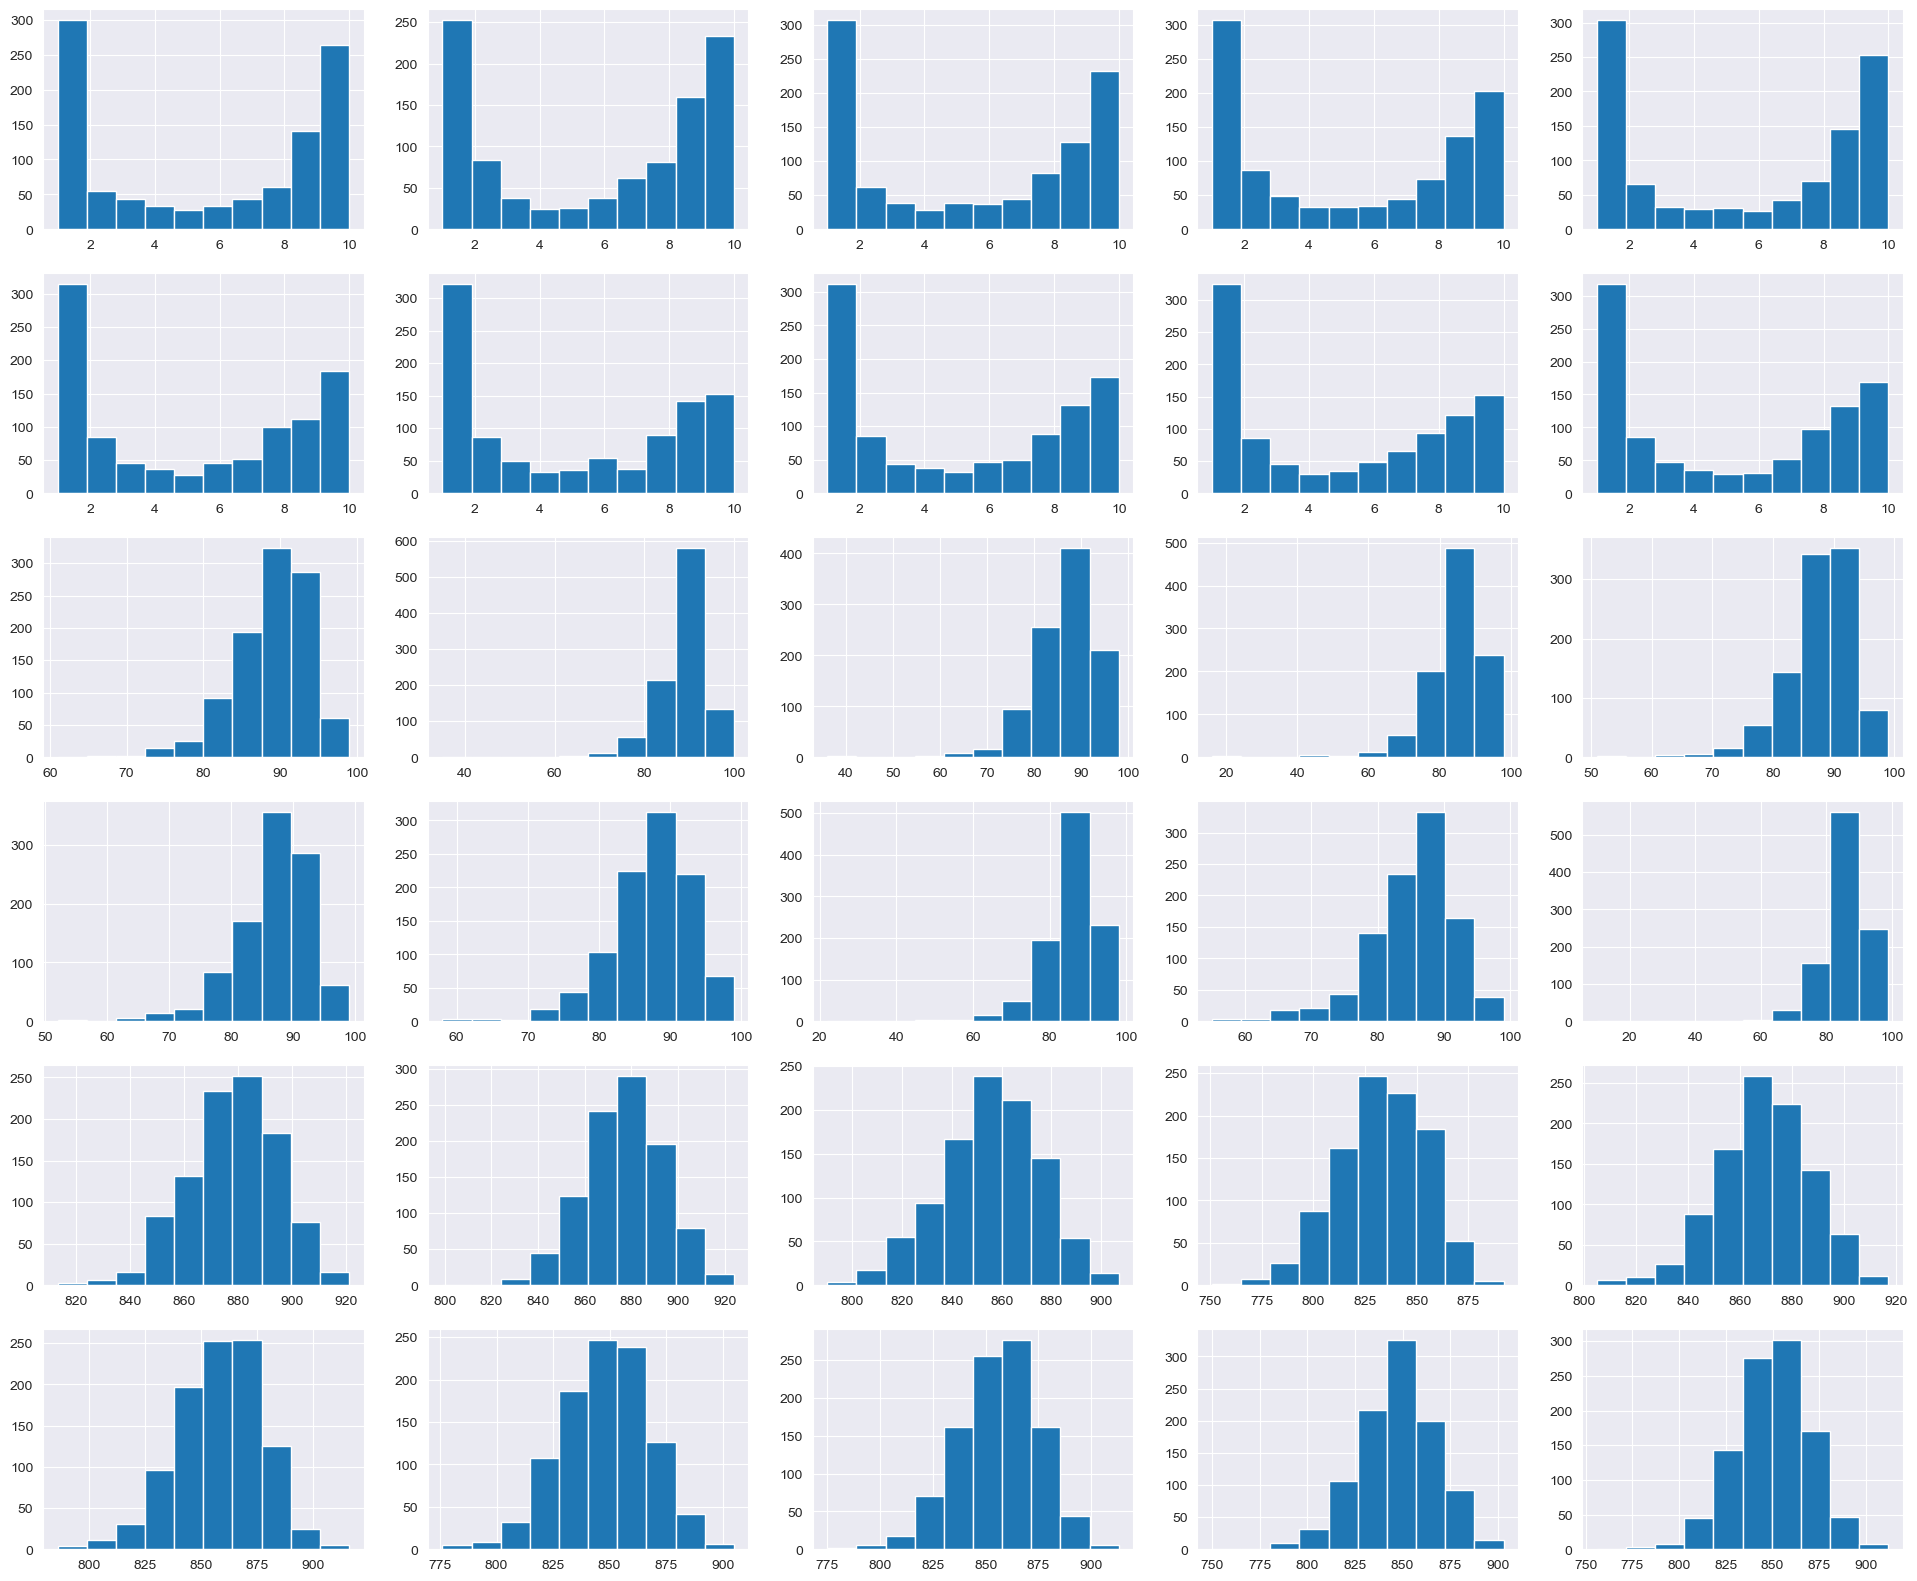

In [10]:
fig, ax0 = plt.subplots(nrows=6, ncols= 5, figsize = (24,20))
counter = 0
for i in range(6):
    for j in range(5):
        ax0[i,j].hist(c3[f"Sim_{counter}"])
        counter += 1
fig.show()

In [11]:
from src.baseSIR import real_sir
from src.baseSIR import traj_sir
from cycler import  cycler

#set the simulation conditions
controls = ["c0","c1","c2","c3"]
regime = controls[0]
omega = 1
b_mod = 0.5
true_gamma = 1
R0 = 3
#c1 is beta; c2 is gamma




N_10_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_10{I0}_b_{R0}.csv", delimiter= ",")
N_100_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_100{I0}_b_{R0}.csv", delimiter= ",")
N_1000_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_1000{I0}_b_{R0}.csv", delimiter= ",")

if sim_g == "free":
    N_10_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/free_g_N_10{I0}_g_{R0}.csv", delimiter= ",")
    N_100_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/free_g_N_100{I0}_g_{R0}.csv", delimiter= ",")
    N_1000_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/free_g_N_1000{I0}_g_{R0}.csv", delimiter= ",")

C:\Users\ollie\AppData\Local\Temp\ipykernel_5124\2985879469.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


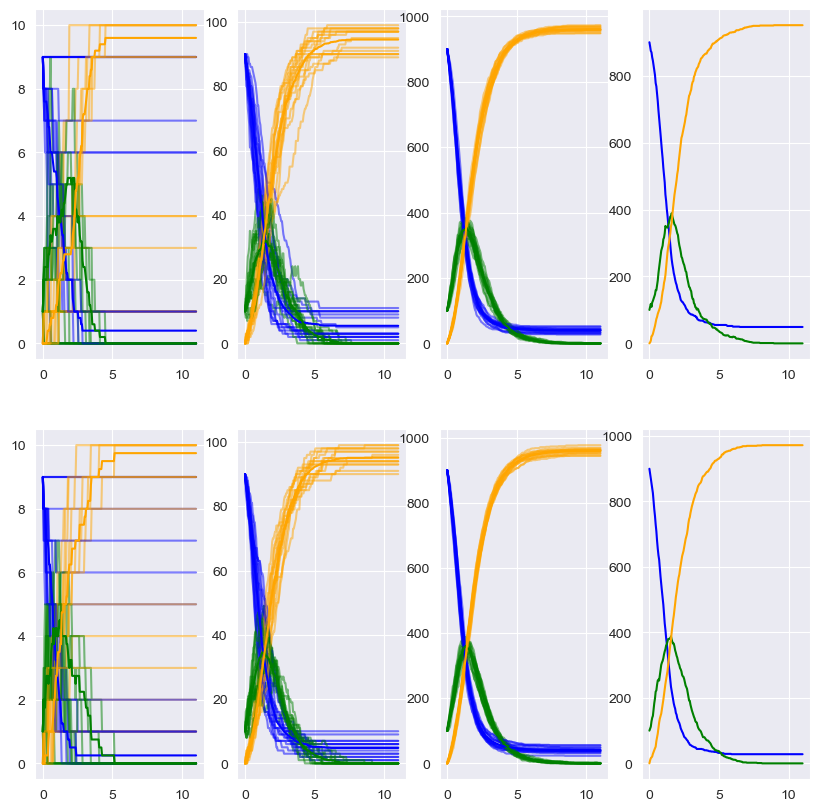

In [13]:


n_traj = 2
mu = 0
tmax = 11.05
tstep = 0.05
n_sim = 15
times = np.arange(0,tmax,tstep)
fig, ax0 = plt.subplots(nrows= n_traj, ncols= 4, figsize = (10,10))
default_cycler = cycler(color=['blue', 'green', 'orange'])
plt.rc('axes', prop_cycle=default_cycler)
for i in range(n_traj):
    seed  = i
    X0 = [900, 100, 0]
    rng = np.random.default_rng(seed)
    run = real_sir(X0,mu,R0,true_gamma,tmax,tstep,rng)
    ax0[i,3].plot(times,run, label = ["S","I","R"])

seed = 1912
rng = np.random.default_rng(seed)
for k in range(3):
    for i in range(n_traj):
        base_sol = run - run
        counter = 0
        if sim_g == "free":
            if k == 0:
                gamma = N_10_g[i,0]
                beta = N_10_b[i,0]
                X0 = [9,1,0]
            elif k == 1:
                gamma = N_100_g[i,0]
                beta = N_100_b[i,0]
                X0 = [90,10,0]
            else:
                gamma = N_1000_g[i,0]
                beta = N_1000_b[i,0]
                X0 = [900,100,0]
        else:
            gamma = true_gamma
            if k == 0:
                beta = N_10_b[i,0]
                X0 = [9,1,0]
            elif k == 1:
                beta = N_100_b[i,0]
                X0 = [90,10,0]
            else:
                beta = N_1000_b[i,0]
                X0 = [900,100,0]
        if regime == "c0":
            g_fac = 0
            b_fac = 1
            cull = 0
        elif regime == "c1":
            g_fac = 0
            b_fac = b_mod
            cull = 0
        elif regime == "c2":
            g_fac = omega
            b_fac = 1
            cull = 0
        elif regime == "c3":
            g_fac = 0
            b_fac = 1
            cull = 0.2
        for j in range(n_sim):
            sol, ex = traj_sir(X0,mu,beta*b_fac,gamma + g_fac,tmax,tstep,rng,cull_strength=cull)
            ax0[i,k].plot(times,sol,alpha = 0.5)
            if ex == 0:
                base_sol = base_sol + sol
                counter += 1
        base_sol= base_sol/counter
        ax0[i,k].plot(times,base_sol)

fig.show()
